# A Prediction Model For Heart Disease Using Support Vector Machine

## GROUP 1:

### Olushola Adeniyi
### Iyabosola Osinowo
### Elishama Yomi-Agbajor

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
nueva=pd.read_csv('heart.csv')
nueva.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
nueva.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
#to check for and count missing values in my dataset
nueva.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

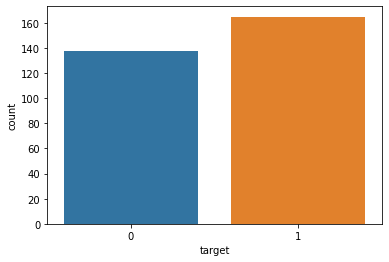

In [5]:
# to visualize the distribution of the target data 
plot = sns.countplot(x='target', data=nueva)
plt.show()

In [6]:
cor_mat= nueva.corr()
cor_mat['target'].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

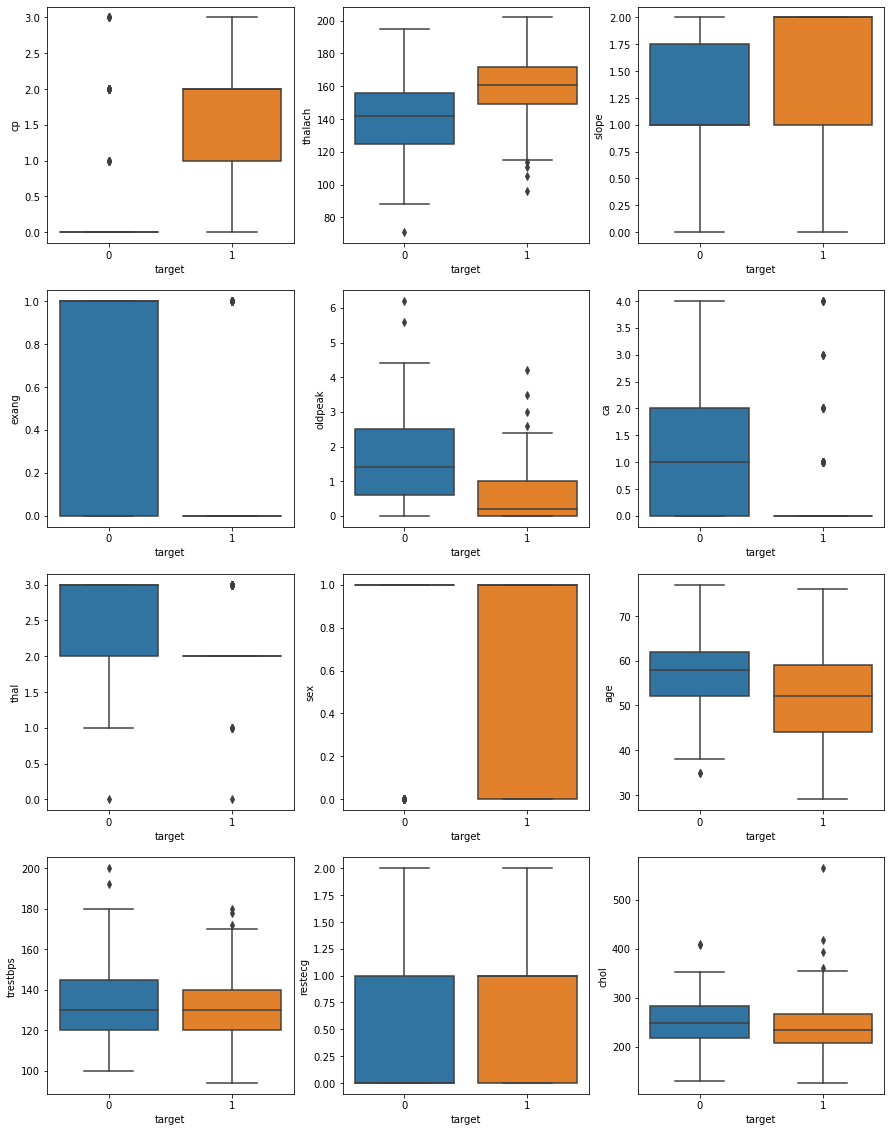

In [7]:
determinants=['cp','thalach','slope','exang','oldpeak','ca','thal','sex','age','trestbps','restecg','chol','fbs']
fig, ax=plt.subplots(4,3,figsize=(15,20))
for var, subplot in zip(determinants, ax.flatten()):
    sns.boxplot(x='target',y=var,data=nueva,ax=subplot)

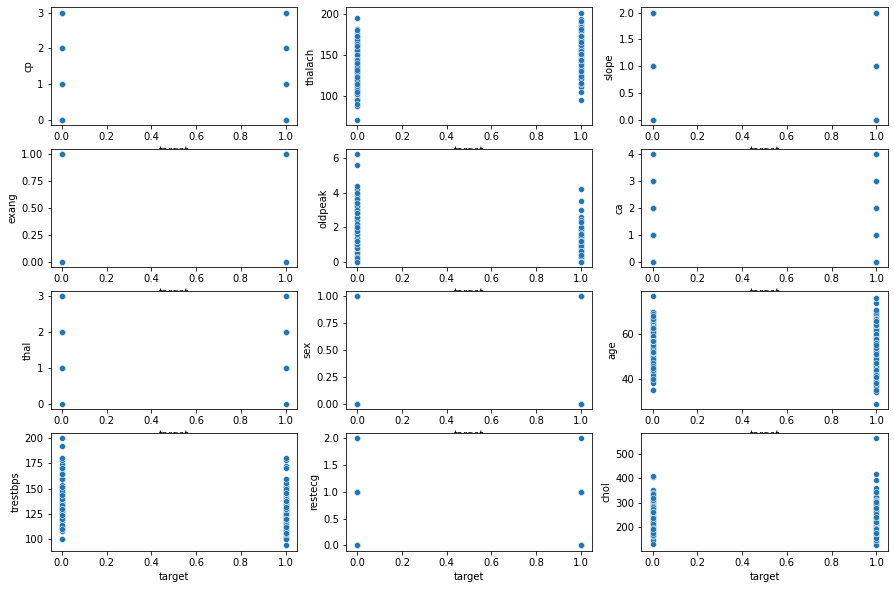

In [8]:
determinants=['cp','thalach','slope','exang','oldpeak','ca','thal','sex','age','trestbps','restecg','chol','fbs']
fig, ax=plt.subplots(4,3,figsize=(15,10))
for var, subplot in zip(determinants, ax.flatten()):
    sns.scatterplot(x='target',y=var,data=nueva,ax=subplot)

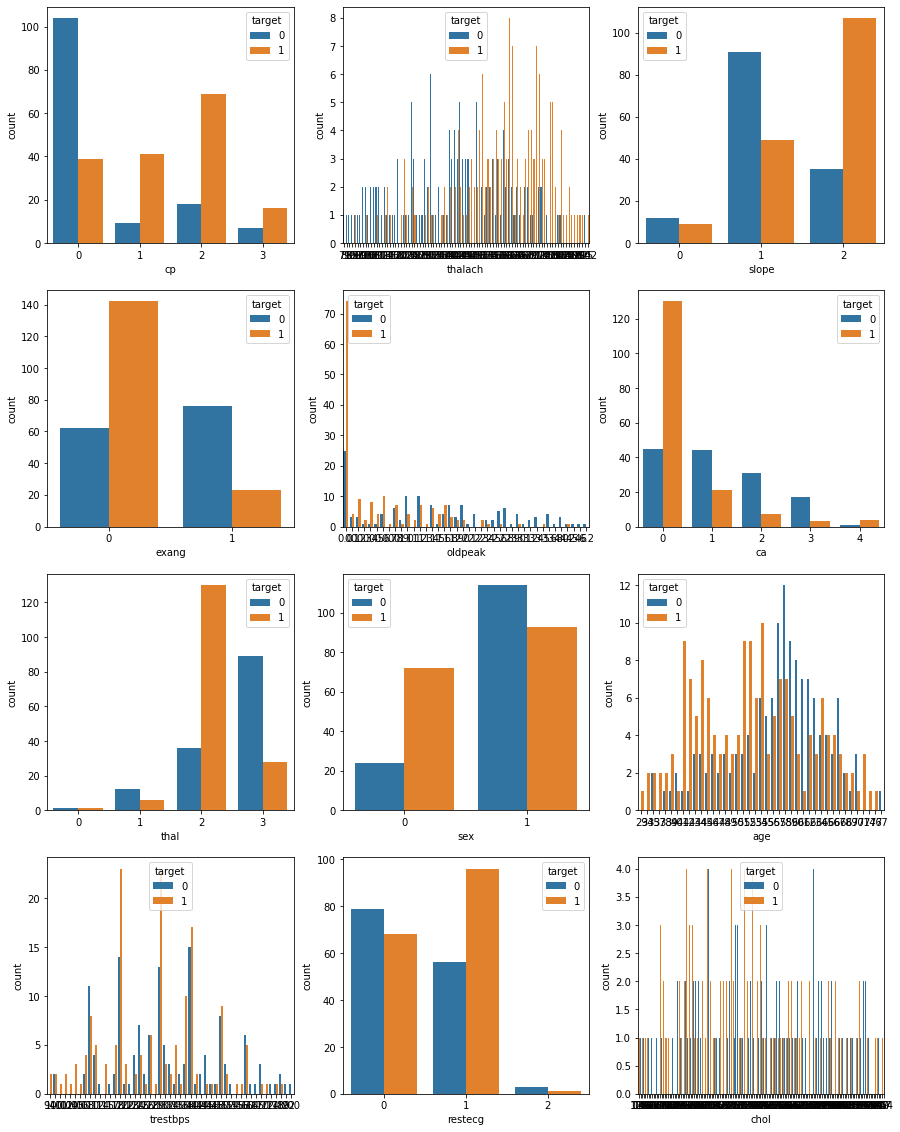

In [9]:
determinants=['cp','thalach','slope','exang','oldpeak','ca','thal','sex','age','trestbps','restecg','chol','fbs']
fig, ax=plt.subplots(4,3,figsize=(15,20))
for var, subplot in zip(determinants, ax.flatten()):
    sns.countplot(x=var,hue='target',data=nueva,ax=subplot)
#sns.countplot(x='promotion_last_5years', hue='left', data=verde)

In [10]:
#to make the variables that ought to be categorical become categorical type
categorical_variables=['sex','fbs','restecg','exang','slope','ca','thal','target']
nueva[categorical_variables]=nueva[categorical_variables].astype('category')
nueva.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    category
 2   cp        303 non-null    int64   
 3   trestbps  303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalach   303 non-null    int64   
 8   exang     303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slope     303 non-null    category
 11  ca        303 non-null    category
 12  thal      303 non-null    category
 13  target    303 non-null    category
dtypes: category(8), float64(1), int64(5)
memory usage: 17.7 KB


In [11]:
relevant_variables=['cp','thalach','slope','exang','oldpeak','ca','thal','sex','age']
nueva[relevant_variables]

,cp,thalach,slope,exang,oldpeak,ca,thal,sex,age
0,3,150,0,0,2.3,0,1,1,63
1,2,187,0,0,3.5,0,2,1,37
2,1,172,2,0,1.4,0,2,0,41
3,1,178,2,0,0.8,0,2,1,56
4,0,163,2,1,0.6,0,2,0,57
...,...,...,...,...,...,...,...,...,...
298,0,123,1,1,0.2,0,3,0,57
299,3,132,1,0,1.2,0,3,1,45
300,0,141,1,0,3.4,2,3,1,68
301,0,115,1,1,1.2,1,3,1,57


In [12]:
#to split the training and testing dataset
from sklearn.model_selection import train_test_split
X = nueva[relevant_variables]
y = nueva.target

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [13]:
#to fit the SVM model with the training data i.e to train the dataset
from sklearn.svm import SVC
svm = SVC(C=1, kernel='linear', random_state=1)
svm.fit(X_train,y_train)

#declaring a variable that holds the predicted value
y_predicted = svm.predict(X_test)
y_predicted

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

In [14]:
#To measure the accuracy of the model
from sklearn import metrics

In [15]:
print('The accuracy score is:',metrics.accuracy_score(y_test,y_predicted))
print('The F1 score is:',metrics.f1_score(y_test,y_predicted))
MSE = metrics.mean_squared_error(y_test, y_predicted)
print('The Mean Squared Error is:',MSE)
print('The RMSE is:',np.sqrt(MSE))

The accuracy score is: 0.8688524590163934
The F1 score is: 0.8918918918918918
The Mean Squared Error is: 0.13114754098360656
The RMSE is: 0.3621429841700741


In [16]:
metrics.confusion_matrix(y_test,y_predicted)
#                  predicted 0      predicted 1
#  observed 0          20               3
#  observed 1          5                33
#Diagonal numbers (20 and 33) indicate the correct predictions [true negative (TN) and true positives (TP)] for the absence (0) and presence (1) of heart disease outcomes for the testing dataset. 
#The other numbers (3 and 5) indicate incorrect predictions [false positives (FP) and false negatives (FN)]

array([[20,  3],
       [ 5, 33]], dtype=int64)

In [17]:
a=metrics.confusion_matrix(y_test,y_predicted)
TN=a[0][0]
TP=a[1][1]
FN=a[1][0]
FP=a[0][1]
print('The sensitivity or True Positive Rate (Recall) is:', TP/(TP+FN))
print('The False Positive Rate (FPR) is:', FP/(FP+TN)) #FPRis also = 1-specificity
print('The specificity is:', TN/(TN+FP)) #Specificity is also = 1-FPR
print('The precision or Positive Predictive Value is:', TP/(TP+FP))

The sensitivity or True Positive Rate (Recall) is: 0.868421052631579
The False Positive Rate (FPR) is: 0.13043478260869565
The specificity is: 0.8695652173913043
The precision or Positive Predictive Value is: 0.9166666666666666


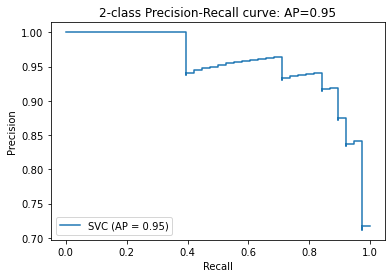

In [18]:
y_score = svm.decision_function(X=X_test)
from sklearn.metrics import precision_recall_curve, average_precision_score, plot_precision_recall_curve
import matplotlib.pyplot as plt
average_precision = average_precision_score(y_true=y_test, y_score=y_score)

# Plot area under the precision-recall curve (AUPRC)
disp = plot_precision_recall_curve(estimator=svm, X=X_test, y=y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
'AP={0:0.2f}'.format(average_precision))
plt.show()

## Conclusion

##### The fitted model has AUPRC 0.95 (average precision) suggesting an acceptable performance. The L-shape AUPRC represents perfect classification performance.
The accuracy of the fitted model is 0.8689. 